In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
from nltk import word_tokenize

In [2]:
df = pd.read_csv('bitcoin_sentiments.csv')

In [3]:
df[:10]

,tweet,date,negative,neutral,positive
0,2020 is the year of #BitCoin #BSV flexed biceps,2020-01-01,0.012835,0.638260,0.348905
1,#Mnuchin Affirms $1.5 Trillion #Unaccounted Fo...,2020-01-01,0.064845,0.806973,0.128182
2,Register from here if you want to join when en...,2020-01-01,0.006078,0.568734,0.425188
3,"Bitcoin's 9,000,000% Rise This Decade Leaves t...",2020-01-01,0.021653,0.621952,0.356396
4,#Mnuchin Affirms $1.5 Trillion #Unaccounted Fo...,2020-01-01,0.064845,0.806973,0.128182
5,Investing in #bitcoin really has changed my li...,2020-01-01,0.001159,0.017912,0.980929
6,Bitcoin COMPRAR O VENDER? | Btc/Criptomonedas ...,2020-01-01,0.041470,0.904992,0.053538
7,The Bitcoin Podcast #278 Benny Giang Cheeze W...,2020-01-01,0.013187,0.902548,0.084265
8,BAM! URGENT REAL-TIME BITCOIN FORECAST We're g...,2020-01-01,0.534997,0.364915,0.100088
9,#Opinion The #halving will do #nothing for #bi...,2020-01-01,0.597228,0.371392,0.031380


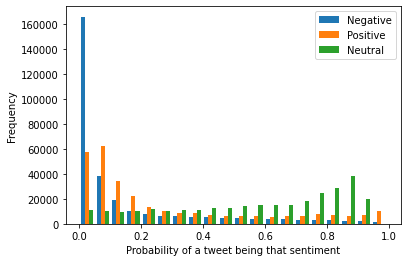

In [4]:
# Fig 1: Frequency is on y-axis, tweets on that day is on x-axis. 500 is most common, but so is 200. 
plt.hist([df['negative'], df['positive'], df['neutral']], 20, label=["Negative", "Positive", "Neutral"])
plt.ylabel("Frequency")
plt.xlabel("Probability of a tweet being that sentiment")
plt.legend(loc='upper right')
plt.show()

([], <a list of 0 Text major ticklabel objects>)

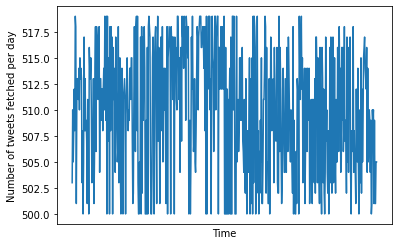

In [5]:
df["date"].value_counts().sort_index().plot.line()
plt.ylabel("Number of tweets fetched per day")
plt.xlabel("Time")
plt.xticks([])

In [6]:
# total tweets
len(df["tweet"])
tweets = df['tweet']

In [7]:
stopwords = set(STOPWORDS)

In [8]:
freq = Counter()
for entry in tweets:
    words = entry.split()
    for word in words:
        if word not in stopwords:
            freq[word]+=1
freq.most_common(10)

[('Bitcoin', 95280),
 ('#Bitcoin', 74023),
 ('#bitcoin', 61460),
 ('I', 41949),
 ('bitcoin', 41029),
 ('-', 40026),
 ('de', 23095),
 ('face', 21886),
 ('#cryptocurrency', 20684),
 ('will', 19638)]

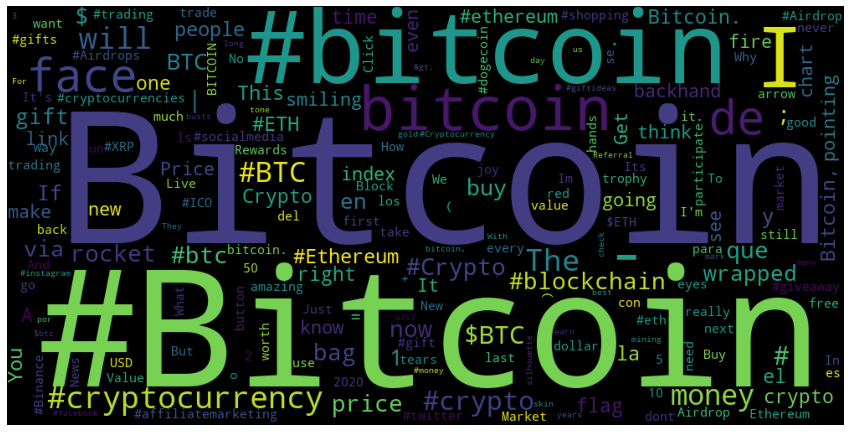

In [9]:
# Fig 2 Wordcloud

wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(freq)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()